# Загрузка необходимых библиотек

In [3]:
import librosa
import pandas as pd
import numpy as np
import librosa.display
import math
import os
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Формирование обучающей и тестовой выборки
## Создание датафрейма

In [2]:
records_amount = 70
dict1 = []
for i in range(records_amount):
    dict1.append('Anton')
for i in range (records_amount):
    dict1.append('Ivan')
for i in range (records_amount):
    dict1.append('Olga')    
for i in range (records_amount):
    dict1.append('Ruslan')
for i in range (records_amount):
    dict1.append('Sasha')
dict1

['Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'I

In [3]:
dict2 = os.scandir("records_wav/")
dict2

In [4]:
dict4 = []
for x in dict2:
    dict4.append(str(x.path))
dict4

['records_wav/Anton_1.wav',
 'records_wav/Anton_10.wav',
 'records_wav/Anton_2.wav',
 'records_wav/Anton_3.wav',
 'records_wav/Anton_4.wav',
 'records_wav/Anton_5.wav',
 'records_wav/Anton_6.wav',
 'records_wav/Anton_7.wav',
 'records_wav/Anton_8.wav',
 'records_wav/Anton_9.wav',
 'records_wav/Anton_balcony.wav',
 'records_wav/Anton_basement.wav',
 'records_wav/Anton_bathroom.wav',
 'records_wav/Anton_bed.wav',
 'records_wav/Anton_bedroom.wav',
 'records_wav/Anton_bulb.wav',
 'records_wav/Anton_car.wav',
 'records_wav/Anton_ceiling.wav',
 'records_wav/Anton_chandelier.wav',
 'records_wav/Anton_cleaning.wav',
 'records_wav/Anton_clock.wav',
 'records_wav/Anton_close.wav',
 'records_wav/Anton_computer.wav',
 'records_wav/Anton_conditioner.wav',
 'records_wav/Anton_console.wav',
 'records_wav/Anton_cupboard.wav',
 'records_wav/Anton_curtains.wav',
 'records_wav/Anton_door.wav',
 'records_wav/Anton_flat.wav',
 'records_wav/Anton_floor.wav',
 'records_wav/Anton_food.wav',
 'records_wav/Anto

In [5]:
d = {"Voice":pd.Series(dict1),
     "File_name":pd.Series(dict4)}
df = pd.DataFrame(d)

In [8]:
df

,Voice,File_name
0,Anton,records_wav/Anton_1.wav
1,Anton,records_wav/Anton_10.wav
2,Anton,records_wav/Anton_2.wav
3,Anton,records_wav/Anton_3.wav
4,Anton,records_wav/Anton_4.wav
...,...,...
345,Sasha,records_wav/Sasha_wall.wav
346,Sasha,records_wav/Sasha_wardrobe.wav
347,Sasha,records_wav/Sasha_water.wav
348,Sasha,records_wav/Sasha_window.wav


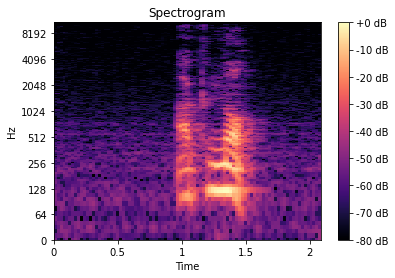

In [4]:
y, sr = librosa.load('records_wav/Sasha_window.wav')
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length=n_fft+1))
spec = np.abs(librosa.stft(y, hop_length = 512))
spec = librosa.amplitude_to_db(spec, ref = np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

## Преобразование аудиофайлов в набор мелкепстральных коэффициентов и добавление их в датафрейм

In [6]:
i = 0
for index,File_name in enumerate(df.File_name):
    X, sample_rate = librosa.load(File_name, duration=2)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
    for x in range(len(mfccs)):
        df.loc[i,x] = mfccs[x]
    i=i+1

## Проверка данных в датафрейме

In [7]:
df

,Voice,File_name,0,1,2,3,4,5,6,7,...,77,78,79,80,81,82,83,84,85,86
0,Anton,records_wav/Anton_1.wav,-14.821739,-15.503858,-15.144800,-14.904045,-15.694471,-16.921579,-16.140873,-15.924280,...,-15.909929,-16.695086,-16.583248,-15.607725,-16.151905,-17.450888,-16.025387,-15.560931,-17.272327,-18.238241
1,Anton,records_wav/Anton_10.wav,-16.761005,-17.111944,-18.739634,-18.386496,-18.136892,-16.857731,-16.628620,-17.528072,...,-16.178383,-15.764051,-17.119884,-16.749063,-16.528173,-16.543789,-15.542124,-16.166086,-16.310228,-16.216450
2,Anton,records_wav/Anton_2.wav,-17.346844,-15.856384,-16.579424,-18.043566,-17.467916,-17.530176,-17.442759,-15.498851,...,-12.232519,-12.118624,-12.399256,-13.119720,-14.749585,-14.045065,-13.346132,-14.744512,-14.505529,-14.767561
3,Anton,records_wav/Anton_3.wav,-13.326192,-13.706265,-15.929436,-16.485956,-15.751750,-16.068962,-16.877949,-17.489349,...,-15.964871,-15.223196,-15.858408,-17.254805,-16.921204,-15.723620,-15.020071,-16.426907,-17.143719,-17.227867
4,Anton,records_wav/Anton_4.wav,-17.075167,-16.563967,-16.893951,-16.199917,-16.053408,-16.492924,-16.223621,-16.482767,...,-18.059696,-17.575956,-15.659462,-15.848727,-17.294176,-16.225332,-15.832402,-16.599854,-17.280102,-17.579655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Sasha,records_wav/Sasha_wall.wav,-17.714350,-14.825543,-13.324170,-15.002192,-15.369431,-14.361616,-14.226863,-14.675517,...,-16.617086,-16.455301,-16.797235,-17.077129,-17.160160,-16.085499,-15.195598,-17.513683,-18.351681,-18.419344
346,Sasha,records_wav/Sasha_wardrobe.wav,-13.079097,-14.263806,-15.930407,-17.389452,-17.348824,-17.734524,-16.980495,-17.126287,...,-17.006357,-16.747856,-15.793019,-16.873207,-18.256914,-18.359472,-18.081074,-17.625538,-16.353970,-17.261925
347,Sasha,records_wav/Sasha_water.wav,-16.549765,-14.587616,-12.694766,-14.116232,-15.155612,-16.019545,-17.108398,-17.533609,...,-16.420355,-16.938648,-17.274879,-17.363657,-16.222876,-16.860960,-19.835629,-19.084641,-17.596180,-16.764063
348,Sasha,records_wav/Sasha_window.wav,-17.588718,-16.844534,-15.415712,-16.259459,-17.687008,-17.768536,-17.379021,-16.661880,...,-17.551935,-18.150167,-17.591312,-15.828421,-15.538118,-16.571781,-16.681641,-16.255823,-17.042362,-19.475405


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


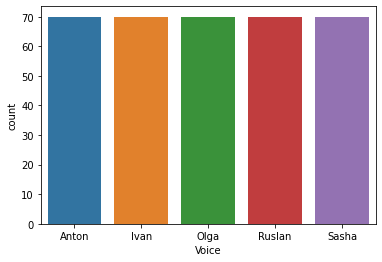

In [9]:
import seaborn as sns
sns.countplot(df['Voice']);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 89 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Voice      350 non-null    object 
 1   File_name  350 non-null    object 
 2   0          350 non-null    float64
 3   1          350 non-null    float64
 4   2          350 non-null    float64
 5   3          350 non-null    float64
 6   4          350 non-null    float64
 7   5          350 non-null    float64
 8   6          350 non-null    float64
 9   7          350 non-null    float64
 10  8          350 non-null    float64
 11  9          350 non-null    float64
 12  10         350 non-null    float64
 13  11         350 non-null    float64
 14  12         350 non-null    float64
 15  13         350 non-null    float64
 16  14         350 non-null    float64
 17  15         350 non-null    float64
 18  16         350 non-null    float64
 19  17         350 non-null    float64
 20  18        

# Разделение данных на тестовую и обучающую выборку

In [24]:
y= pd.get_dummies(df.Voice)
tr_x, test_x, tr_y, test_y= train_test_split(df.drop(["Voice","File_name"], 
                                    axis=1), y,
                                    test_size=0.3, 
                                    random_state=40)

In [27]:
tr_x.shape

(245, 87)

## Преобразование данных в нужный формат

In [28]:
train_data = df.drop(["Voice", "File_name"],axis = 1)
train_labels = df["Voice"]
tr_x2 = np.zeros((tr_x.shape[0],tr_x.shape[1],1))
for i in range(tr_x.shape[0]):
    for j in range(tr_x.shape[1]):
        tr_x2[i][j][0] = tr_x.iloc[i,j]
tr_x2.shape

(245, 87, 1)

In [29]:
test_x2 = np.zeros((test_x.shape[0],test_x.shape[1],1))
for i in range(test_x.shape[0]):
    for j in range(test_x.shape[1]):
        test_x2[i][j][0] = test_x.iloc[i,j]
test_x2.shape

(105, 87, 1)

# Создание сверточной нейронной сети

In [32]:
model = keras.Sequential()

model.add(keras.layers.Conv1D (64,2, padding = "same", activation = "relu",input_shape=(tr_x2.shape[1],1)))
model.add(keras.layers.Dropout(0.23))
model.add(keras.layers.MaxPooling1D(pool_size=4))

model.add(keras.layers.Conv1D(32,2, padding = "same", activation = "relu"))
model.add(keras.layers.Dropout(0.23))
model.add(keras.layers.MaxPooling1D(pool_size=4))

model.add(keras.layers.Conv1D(16,2, padding = "same", activation = "relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation="sigmoid"))

# Обучение сети

In [33]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", metrics=["accuracy"])
history = model.fit(tr_x2, tr_y, validation_data=(test_x2,test_y),
                    epochs=70,steps_per_epoch=245,validation_steps=105)

Epoch 1/70
245/245 [==============================] - 1s 3ms/step - loss: 1.7605 - accuracy: 0.2408 - val_loss: 1.5598 - val_accuracy: 0.2762
Epoch 2/70
245/245 [==============================] - 1s 2ms/step - loss: 1.5783 - accuracy: 0.2857 - val_loss: 1.5075 - val_accuracy: 0.2952
Epoch 3/70
245/245 [==============================] - 1s 2ms/step - loss: 1.5571 - accuracy: 0.2898 - val_loss: 1.5114 - val_accuracy: 0.4000
Epoch 4/70
245/245 [==============================] - 1s 2ms/step - loss: 1.4938 - accuracy: 0.2980 - val_loss: 1.4031 - val_accuracy: 0.4286
Epoch 5/70
245/245 [==============================] - 1s 2ms/step - loss: 1.4341 - accuracy: 0.3429 - val_loss: 1.3911 - val_accuracy: 0.4190
Epoch 6/70
245/245 [==============================] - 1s 2ms/step - loss: 1.3907 - accuracy: 0.3796 - val_loss: 1.3687 - val_accuracy: 0.2952
Epoch 7/70
245/245 [==============================] - 0s 2ms/step - loss: 1.3810 - accuracy: 0.3878 - val_loss: 1.3485 - val_accuracy: 0.4571
Epoch 

# Сохранение модели

In [35]:
model.save('My_model.h5')

In [10]:
from keras.models import load_model
model = load_model('My_model.h5')

In [117]:
history.history['accuracy'][-1]

0.8204081654548645

# График точности тренировочных и проверочных данных

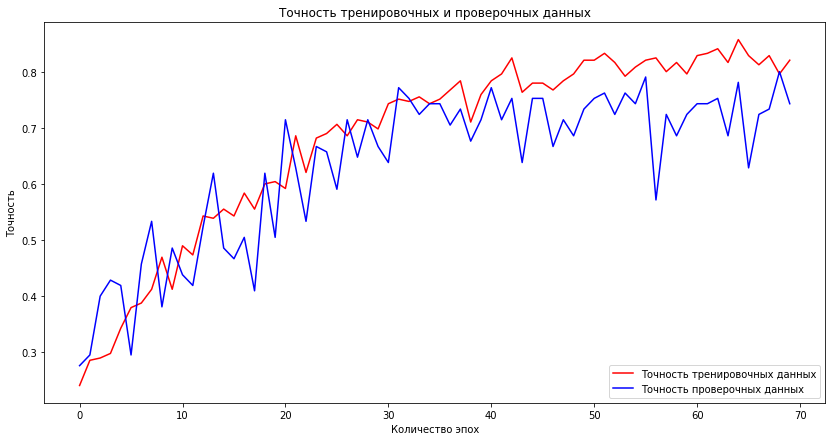

In [34]:
import matplotlib.pyplot as plt
accur = history.history['accuracy']
val_accur = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(14,7))
plt.plot(range(len(accur)), accur, 'r', label="Точность тренировочных данных")
plt.plot(range(len(accur)), val_accur, 'b', label="Точность проверочных данных")
plt.xlabel('Количество эпох')
plt.ylabel('Точность')
plt.title('Точность тренировочных и проверочных данных')
plt.legend(loc='lower right')
plt.show()

# Создание пользовательского интерфейса

In [11]:
from tkinter import *
from tkinter.filedialog import askopenfilename
from tkinter import filedialog
from tkinter import ttk

In [9]:
df['Voice'].unique()

array(['Anton', 'Ivan', 'Olga', 'Ruslan', 'Sasha'], dtype=object)

In [16]:
index = list(df['Voice'].unique())
index

['Anton', 'Ivan', 'Olga', 'Ruslan', 'Sasha']

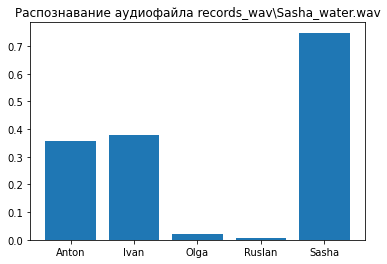

'Sasha'

In [12]:
import matplotlib.pyplot as plt
file_name = 'records_wav\\Sasha_water.wav'
X, sample_rate = librosa.load(file_name, duration=2)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
mfccs2 = np.zeros((1,len(mfccs),1))
i = 0
for j in range(len(mfccs)):
    mfccs2[i][j][0] = mfccs[j]
arr = model.predict(mfccs2)
for _ in arr:
    l = list(_)
d = {0:'Anton',1:'Ivan',2:'Olga',3:'Ruslan',4:'Sasha'}
index = list(df['Voice'].unique())
plt.bar(index,l)
plt.title('Распознавание аудиофайла %s'%(file_name))
plt.show()
d[l.index(max(l))]

In [ ]:
def choose_file():
    selected_file = filedialog.askopenfilename(title="select file")
    folder_path_2 = selected_file.split('/')
    folder_path3 = folder_path_2[-2] + '\\' + folder_path_2[-1]
    folder_path.set(folder_path3)

In [ ]:
def recognize():
    X, sample_rate = librosa.load(folder_path.get(), duration=2)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
    mfccs2 = np.zeros((1,len(mfccs),1))
    i = 0
    for j in range(len(mfccs)):
        mfccs2[i][j][0] = mfccs[j]
    arr = model.predict(mfccs2)
    for _ in arr:
        l = list(_)
    d = {0:'Anton',1:'Ivan',2:'Olga',3:'Ruslan',4:'Sasha'}
    result.set(d[l.index(max(l))])

In [13]:
window = Tk()
window.geometry('750x400')
window.title("ВКР Тертышник А.А. группа М3О-411Б-18")
    
lbl = Label(window, text="Система распознавания голоса",font=("Times New Roman", 40))  
lbl.grid(column=0, row=0,padx=10, pady=10)  

lbl2 = Label(window, text='  '.join(list(df['Voice'].unique())),font=("Times New Roman", 40))  
lbl2.grid(column=0, row=2)  

btn = Button(window, text="Выберите файл",font=("Times New Roman", 20),command=choose_file)  
btn.grid(column=0, row=4)

folder_path = StringVar()  # where clip is stored
result = StringVar()

ent1 = Entry(window, textvariable=folder_path)
ent1.grid(row = 5, column = 0, padx=10, ipadx=40, pady=10)

btn2 = Button(window, text="Распознать",font=("Times New Roman", 20),command=recognize)  
btn2.grid(column=0, row=6)

ent2 = Entry(window, textvariable=result)
ent2.grid(row = 7, column = 0, padx=10, ipadx=40, pady=10)

window.mainloop()